Installing the contractions library and importing the necessary libraries

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 11.7 MB/s eta 0:00:00


In [ ]:
import re, string, unicodedata                          
import contractions             
import matplotlib.pyplot as plt  
import numpy as np                                      
import pandas as pd                                     
import nltk                                    
from bs4 import BeautifulSoup                          
from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer         
                                 

nltk.download('stopwords')                           
nltk.download('punkt')
nltk.download('wordnet')
                       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#1. Import the data 


In [ ]:
# Connect to google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data from youru google drive 
import pandas as pd
data=pd.read_csv('drive/My Drive/ecommerceDataset.csv')

#2. Exploratory Data Analysis

In [ ]:
# Print data shappe and the first few rows. 
print(data.shape)
print(data.head())

(50424, 2)
                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [ ]:
# The text description for the first row
print(data['Description'][0])

Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories


The data contains 50424 rows and two columns. 

In [ ]:
print(type(data['Category'][0]))
print(type(data['Description'][0]))

<class 'str'>
<class 'str'>


Both columns contain strings. 

Now let's drop the missing values. 

In [ ]:
data=data.dropna()
data.shape

(50423, 2)

There seems to only be one row that had missing data since the number of rows dropped from 50424 to 50423. 

Now let's check the unique values in the Label column and let's save it in a list called labels. 

In [ ]:
labels=data['Category'].unique()
print(labels)
print(data.head(5))

['Household' 'Clothing & Accessories' 'Electronics' 'Books']
                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


#**Plot the word cloud graph of the text column description for each product('Household', 'Clothing &      Accessories', 'Electronics', 'Books') separately.**

In [ ]:

data['Description'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1) 

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Description'].astype(str).tolist())                 
    stopwords = set(wordcloud.STOPWORDS)                                 
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',     
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

<ipython-input-13-316279dd7fb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)


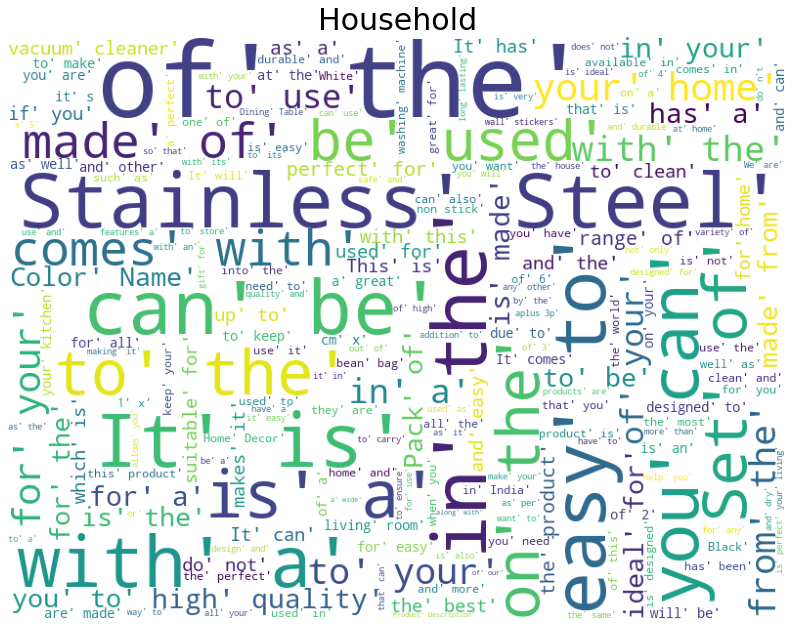

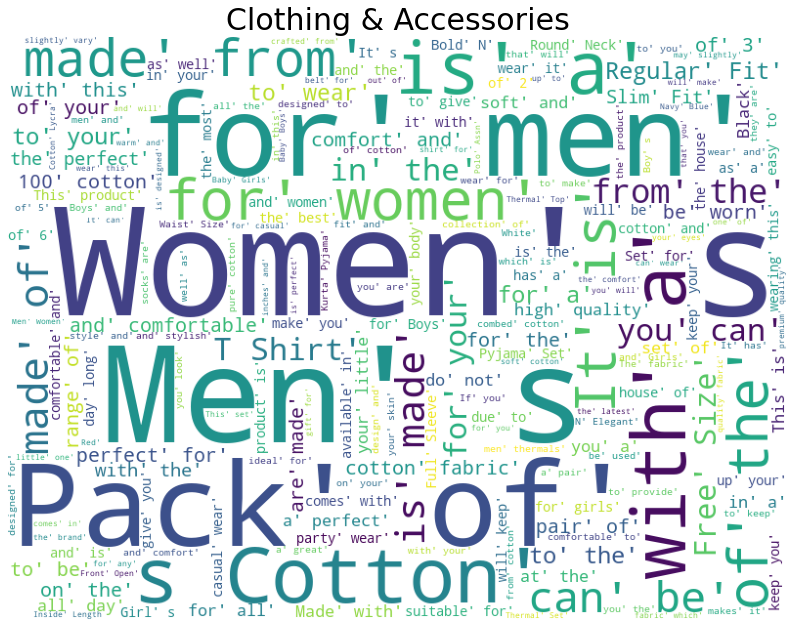

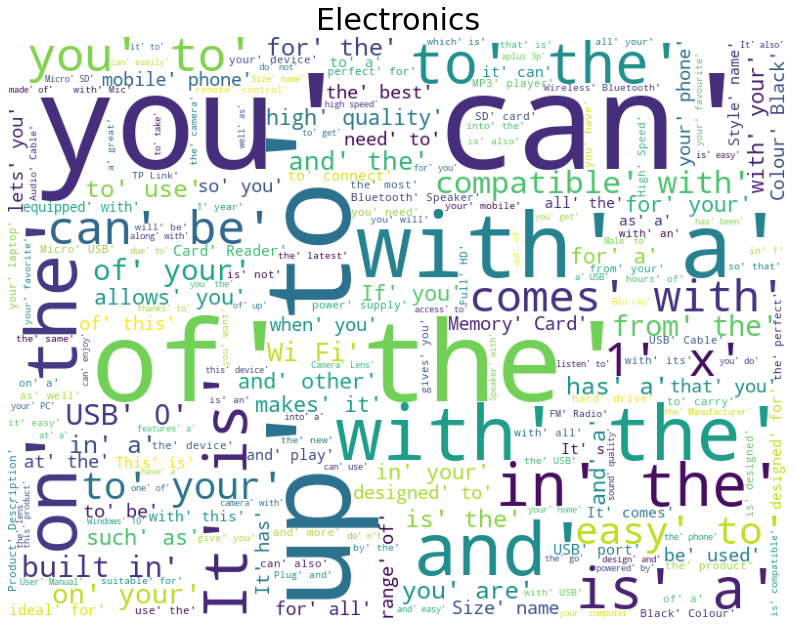

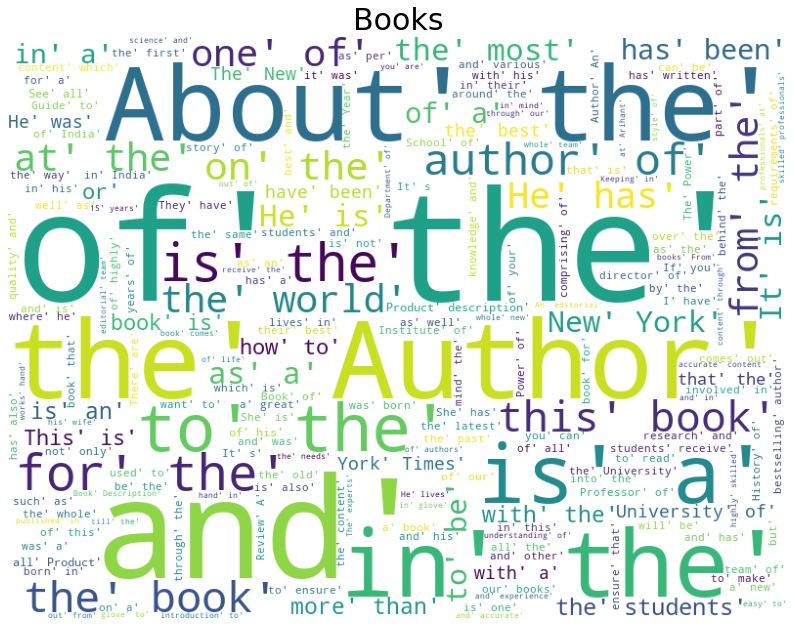

In [ ]:
# This forloop goes through the labels and for each category will print the worldcloud. 
for category in labels:
  show_wordcloud(data[data['Category']==category], category)

A few things to notice here is that some words are more helpful than others when it comes to classifying items based on the description. So for example words like "THE", "IT", and "IS" are not as helpful in the classification as the words "Cotton", "Book" etc. 

#**3. Text pre-processing: Data preparation.**

a. Html tag remover

In [ ]:
# Realoading the data and dropping NA since we tokenized the data for the worldcloud. 

data=pd.read_csv('drive/My Drive/ecommerceDataset.csv')
data=data.dropna()


def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['Description'] = (data['Description'].apply(lambda x: strip_html(x))).copy(deep=True)

print(data.head())

                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


Remove numbers

In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Description'] = (data['Description'].apply(lambda x: remove_numbers(x))).copy(deep=True)
print(data.head())

                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-BKN Deluxe Electric Can Opener, ...
2               Household  Anchor Penta  Amp  -Way Switch (White) - Pack ...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, % Po...
4               Household  Chef's Garage  Slot Edge Grip Kitchen Knife Sh...


From running the data I noticed that words like it's and men's that could be written as its and mens. 

In [ ]:
def fix_words(text):
  text = re.sub("'", "", text)
  text = re.sub("`", "", text)
  return text

data['Description'] = (data['Description'].apply(lambda x: fix_words(x))).copy(deep=True)

In [ ]:
print(data.head())

                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-BKN Deluxe Electric Can Opener, ...
2               Household  Anchor Penta  Amp  -Way Switch (White) - Pack ...
3  Clothing & Accessories  Proline Mens Track Jacket Proline Woven, % Pol...
4               Household  Chefs Garage  Slot Edge Grip Kitchen Knife Sha...


Tokenize the data

In [ ]:
data['Description'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1) 

In [ ]:
data.head()

,Category,Description
0,Household,"[Styleys, Wrought, Iron, Coat, Rack, Hanger, C..."
1,Household,"[Cuisinart, CCO-BKN, Deluxe, Electric, Can, Op..."
2,Household,"[Anchor, Penta, Amp, -Way, Switch, (, White, )..."
3,Clothing & Accessories,"[Proline, Mens, Track, Jacket, Proline, Woven,..."
4,Household,"[Chefs, Garage, Slot, Edge, Grip, Kitchen, Kni..."


These methods will remove special characters, and punctuation, make everything lowercase, remove the stopwords and lemmatize the data. 

In [ ]:
from nltk.corpus import stopwords          
stopwords = stopwords.words('english')
nltk.download('omw-1.4') 
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return(words)

data['Description'] = data.apply(lambda row: normalize(row['Description']), axis=1)
data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Category,Description
0,Household,"[styleys, work, iron, coat, rack, hanger, crea..."
1,Household,"[cuisinart, ccobkn, deluxe, electric, opener, ..."
2,Household,"[anchor, penta, amp, way, switch, white, pack,..."
3,Clothing & Accessories,"[proline, mens, track, jacket, proline, weave,..."
4,Household,"[chefs, garage, slot, edge, grip, kitchen, kni..."


Since the data is already tokenized, I would like to see what the wordcloud for each category looks like after the data cleanup. As we can see the words here are better connected to the category and more specific. 

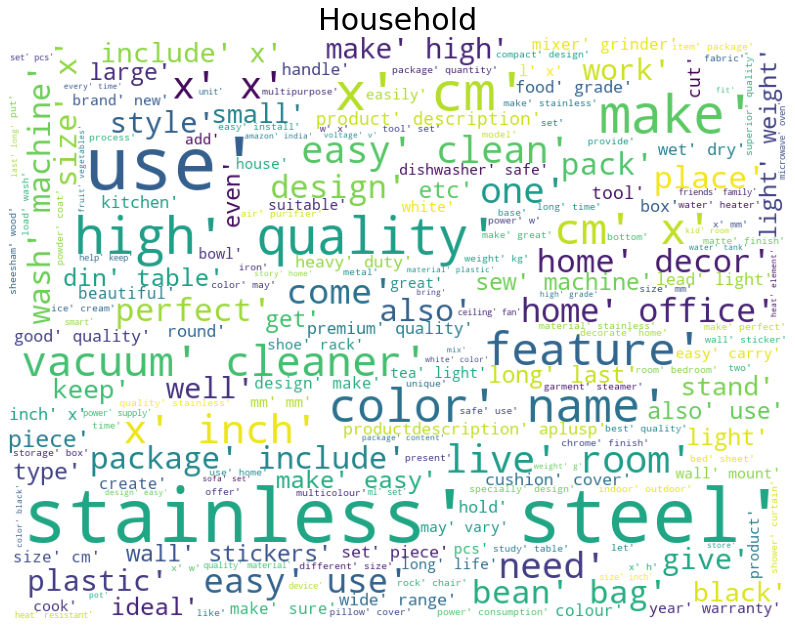

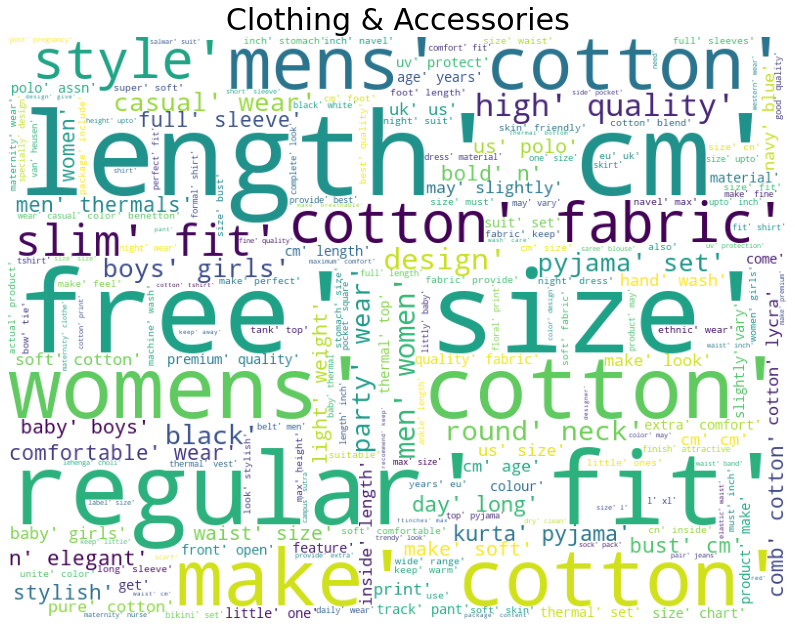

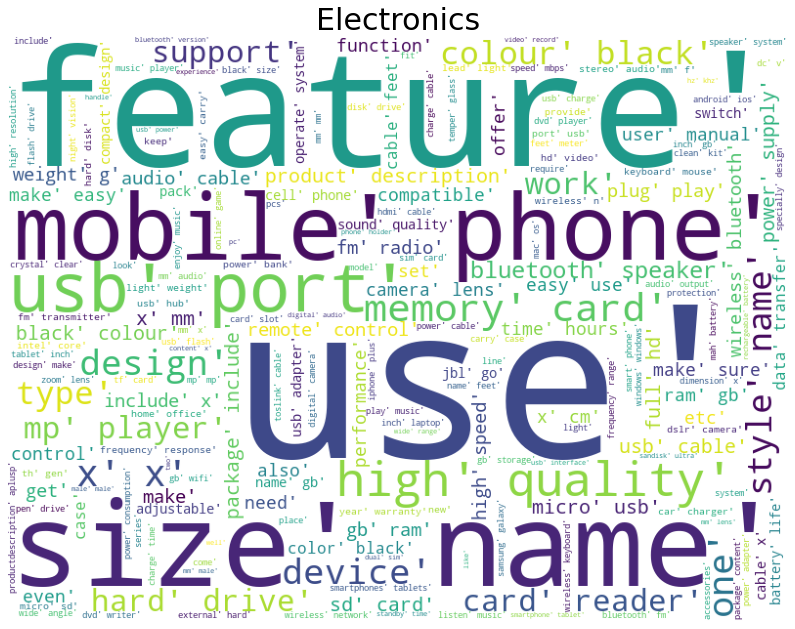

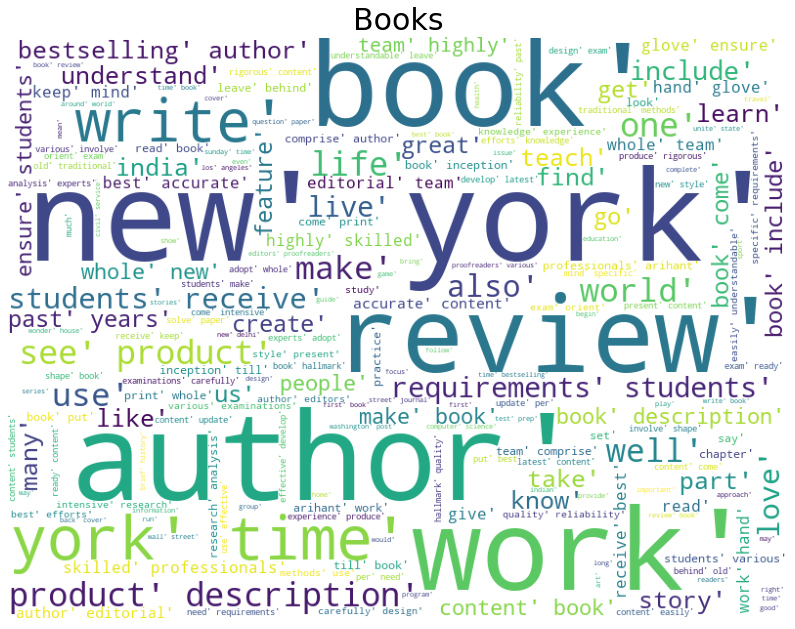

In [ ]:
for category in labels:
  show_wordcloud(data[data['Category']==category], category)

In [ ]:
def turn_into_strings(words):
    return ' '.join(words)

data['Description'] = data.apply(lambda row: turn_into_strings(row['Description']), axis=1)

The first five rows now look like this:

In [ ]:
print(data.head())

                 Category                                        Description
0               Household  styleys work iron coat rack hanger creative fa...
1               Household  cuisinart ccobkn deluxe electric opener black ...
2               Household  anchor penta amp way switch white pack anchor ...
3  Clothing & Accessories  proline mens track jacket proline weave polyes...
4               Household  chefs garage slot edge grip kitchen knife shar...


# **Building the model based on CountVectorizer and Random Forest**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(data['Description'])

data_features = data_features.toarray()  

In [ ]:
data_features.shape

(50423, 2000)

This part will turn all labels into numbers and save them in all_lables. This will be used for training the 

In [ ]:
all_labels = data['Category'].copy(deep=True)
all_labels = all_labels.tolist()
for i in range(len(all_labels)):
  if all_labels[i] == 'Household':
    all_labels[i] = 0
  if all_labels[i] == 'Clothing & Accessories':
    all_labels[i] = 1
  if all_labels[i] == 'Electronics':
    all_labels[i] = 2
  if all_labels[i] == 'Books':
    all_labels[i] = 3

Splitting the data into train and test data. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, all_labels, test_size=0.3, random_state=42)



Building the classifier model using random forest. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, all_labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.9682683424729005


Doing cross-validation for the model. 

In [ ]:
base_ln = [x for x in range(1, 25)]
base_ln

cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

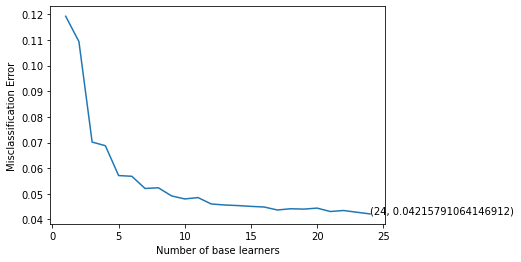

In [ ]:
error = [1 - x for x in cv_scores]                                 
optimal_learners = base_ln[error.index(min(error))]                
plt.plot(base_ln, error)                                          
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Looks like we get the best results around 18.

In [ ]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.967210947312752

The model has a 96.7% accuracy which seems good. 

In [ ]:
result =  clf.predict(X_test)                  

This is the confusion matrix which shows that most guesses were correct. 

[[5642   41   42   49]
 [  52 2522    9   13]
 [ 129    8 3004   26]
 [  95   10   22 3463]]
0.967210947312752


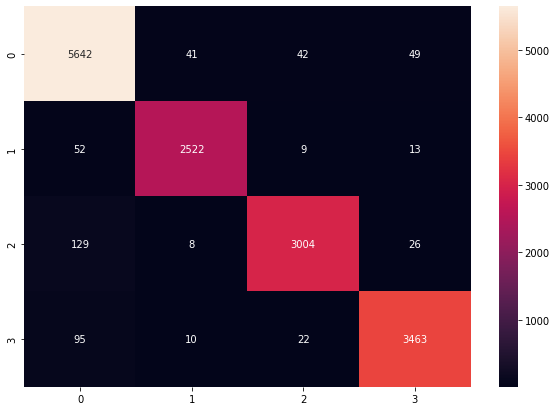

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')